<a href="https://colab.research.google.com/github/shreyakabra/Zeotap-Assignment/blob/main/Shreya_Kabra_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()  # This will open a file dialog to upload the ZIP file


Saving Zeoptap_Assignment.zip to Zeoptap_Assignment.zip


In [5]:
import zipfile
import os

# Specify the zip file name
zip_file = "Zeoptap_Assignment.zip"  # Replace with the correct file name if different

# Extract the zip file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("Zeoptap_Assignment")

# Check the extracted files
os.listdir("Zeoptap_Assignment")


['Zeoptap_Assignment']

In [7]:
pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=babd45bddb67afbb76bd0fee6b7e88a40e6887b2e930f9883ca39864ae828191
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [10]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from fpdf import FPDF

# Load the datasets
customers = pd.read_csv("Zeoptap_Assignment/Zeoptap_Assignment/Customers.csv")
products = pd.read_csv("Zeoptap_Assignment/Zeoptap_Assignment/Products.csv")
transactions = pd.read_csv("Zeoptap_Assignment/Zeoptap_Assignment/Transactions.csv")

In [11]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [21]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [22]:
customers.isna().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [12]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [23]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [25]:
products.isna().sum()

,0
ProductID,0
ProductName,0
Category,0
Price,0


In [13]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [26]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [27]:
transactions.isna().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


In [29]:
# Converting date columns to datetime format for analysis
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [32]:
# Checking for missing values
missing_values = {
    "Customers": customers.isnull().sum(),
    "Products": products.isnull().sum(),
    "Transactions": transactions.isnull().sum(),
}
print(missing_values)

{'Customers': CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64, 'Products': ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64, 'Transactions': TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64}


In [33]:
# Quick summary statistics for numerical columns
transactions_summary = transactions.describe()

print(transactions_summary)

                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639


Task 1: Exploratory Data Analysis (EDA) and Business Insights

In [14]:
# Combine datasets for EDA
transactions["TotalValue"] = transactions["Quantity"] * transactions["Price"]

In [15]:
# Summarize data
eda_summary = transactions.describe()

In [17]:
eda_summary.T

,count,mean,std,min,25%,50%,75%,max
Quantity,1000.0,2.53700,1.117981,1.00,2.000,3.00,4.00,4.00
TotalValue,1000.0,689.99556,493.144478,16.08,295.295,588.88,1011.66,1991.04
Price,1000.0,272.55407,140.736390,16.08,147.950,299.93,404.40,497.76


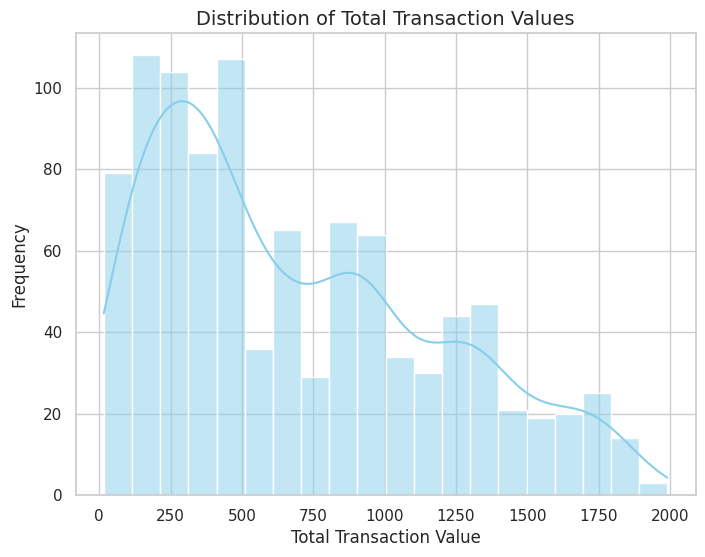

In [35]:
# Set visual style
sns.set(style="whitegrid")

# Distribution of total transaction values
plt.figure(figsize=(8, 6))
sns.histplot(transactions['TotalValue'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Transaction Values', fontsize=14)
plt.xlabel('Total Transaction Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<ipython-input-36-03540d5a9e7d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


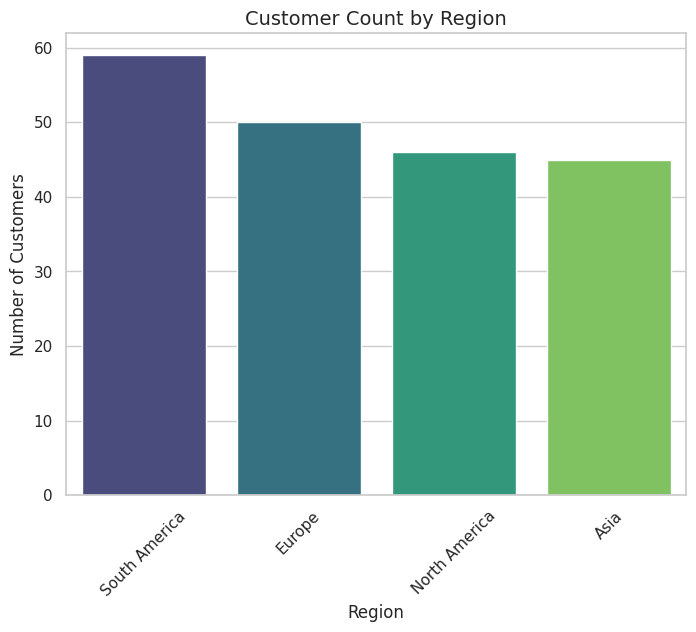

In [36]:
# Most frequent regions in customer data
region_counts = customers['Region'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Customer Count by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()


<ipython-input-38-de81e1520966>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="coolwarm")


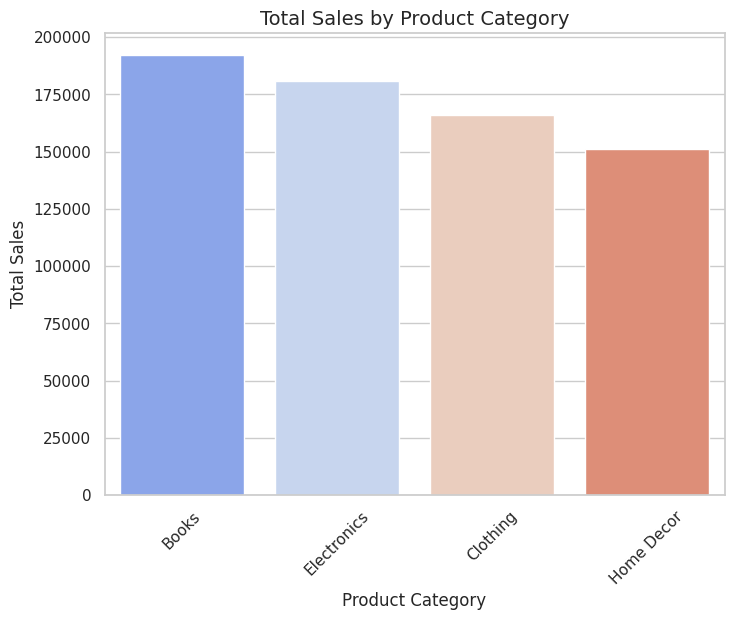

In [38]:
# Product categories by sales
merged = transactions.merge(products, on="ProductID")
category_sales = merged.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="coolwarm")
plt.title('Total Sales by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [39]:
# Merging customer data with transactions
customer_data = transactions.groupby("CustomerID").agg({"TotalValue": "sum"}).reset_index()
customers = pd.merge(customers, customer_data, on="CustomerID", how="left")

In [49]:
business_insights = [
    "1. The majority of transaction values are concentrated under Rs. 1,000, indicating price-sensitive purchasing behavior. "
    "Strategies like discounts on mid-range products could increase sales in this segment.",

    "2. Region-wise analysis reveals certain regions have significantly higher customer concentrations. "
    "These regions could be targeted for focused marketing campaigns.",

    "3. Sales analysis by product category shows that a few categories dominate revenue generation. "
    "Expanding these categories or introducing similar products might drive further sales growth.",

    "4. High variability in product pricing suggests diverse customer preferences. "
    "Introducing tiered pricing models could better address the needs of different customer segments.",

    "5. The top-performing products and regions demonstrate a potential for bundling strategies. "
    "Cross-selling in high-performing regions can further optimize revenue."
]

# Display insights to include in the PDF report
business_insights

['1. The majority of transaction values are concentrated under Rs. 1,000, indicating price-sensitive purchasing behavior. Strategies like discounts on mid-range products could increase sales in this segment.',
 '2. Region-wise analysis reveals certain regions have significantly higher customer concentrations. These regions could be targeted for focused marketing campaigns.',
 '3. Sales analysis by product category shows that a few categories dominate revenue generation. Expanding these categories or introducing similar products might drive further sales growth.',
 '4. High variability in product pricing suggests diverse customer preferences. Introducing tiered pricing models could better address the needs of different customer segments.',
 '5. The top-performing products and regions demonstrate a potential for bundling strategies. Cross-selling in high-performing regions can further optimize revenue.']

In [50]:
# PDF Report Generation
class PDFReport(FPDF):
    def header(self):
        self.set_font("Arial", "B", 12)
        self.cell(0, 10, "Task 1: EDA and Business Insights", align="C", ln=True)
        self.ln(10)

    def chapter_title(self, title):
        self.set_font("Arial", "B", 12)
        self.cell(0, 10, title, ln=True)
        self.ln(5)

    def chapter_body(self, body):
        self.set_font("Arial", "", 11)
        self.multi_cell(0, 10, body)
        self.ln()



In [51]:
# Generate the PDF
pdf = PDFReport()
pdf.add_page()
pdf.chapter_title("Business Insights")
for insight in business_insights:
    pdf.chapter_body(insight)

pdf.output("Shreya_Kabra_EDA.pdf")

''